## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  21.980714   129.991053  0.285427  5.652957  1.059659
1  20.303644  1745.323429  0.771247  4.220825  1.541271
2  91.364269   262.472942  0.639518  8.078391  1.113561
3  77.704017   369.729330  0.321207  6.875036  0.904290
4  30.287740   521.513625  0.154068  6.413067  1.125849


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0527872	total: 62.5ms	remaining: 1m 2s
1:	learn: 1.0412951	total: 63.1ms	remaining: 31.5s
2:	learn: 1.0304567	total: 63.6ms	remaining: 21.1s
3:	learn: 1.0187278	total: 64.5ms	remaining: 16.1s
4:	learn: 1.0067636	total: 65ms	remaining: 12.9s
5:	learn: 0.9967757	total: 65.5ms	remaining: 10.9s
6:	learn: 0.9850869	total: 66ms	remaining: 9.37s
7:	learn: 0.9747284	total: 66.6ms	remaining: 8.26s
8:	learn: 0.9626834	total: 67.1ms	remaining: 7.39s
9:	learn: 0.9513960	total: 67.6ms	remaining: 6.7s
10:	learn: 0.9421422	total: 68.1ms	remaining: 6.12s
11:	learn: 0.9311270	total: 68.7ms	remaining: 5.66s
12:	learn: 0.9227391	total: 69.9ms	remaining: 5.3s
13:	learn: 0.9128361	total: 70.8ms	remaining: 4.99s


14:	learn: 0.9002050	total: 71.4ms	remaining: 4.69s
15:	learn: 0.8915914	total: 72.7ms	remaining: 4.47s
16:	learn: 0.8808812	total: 73.2ms	remaining: 4.23s
17:	learn: 0.8714156	total: 73.7ms	remaining: 4.02s
18:	learn: 0.8632561	total: 74.3ms	remaining: 3.83s
19:	learn: 0.8532415	total: 74.8ms	remaining: 3.66s
20:	learn: 0.8431387	total: 75.3ms	remaining: 3.51s
21:	learn: 0.8325126	total: 76ms	remaining: 3.38s
22:	learn: 0.8245902	total: 76.7ms	remaining: 3.26s
23:	learn: 0.8154988	total: 77.1ms	remaining: 3.14s
24:	learn: 0.8054415	total: 78.1ms	remaining: 3.05s
25:	learn: 0.7979690	total: 78.6ms	remaining: 2.94s
26:	learn: 0.7901762	total: 79.4ms	remaining: 2.86s
27:	learn: 0.7811990	total: 79.7ms	remaining: 2.77s
28:	learn: 0.7724249	total: 80.1ms	remaining: 2.68s
29:	learn: 0.7638766	total: 81.1ms	remaining: 2.62s
30:	learn: 0.7562533	total: 81.7ms	remaining: 2.55s
31:	learn: 0.7483185	total: 82.4ms	remaining: 2.49s
32:	learn: 0.7425434	total: 83.1ms	remaining: 2.44s
33:	learn: 0.7

205:	learn: 0.2542495	total: 159ms	remaining: 612ms
206:	learn: 0.2532778	total: 160ms	remaining: 611ms
207:	learn: 0.2522234	total: 160ms	remaining: 609ms
208:	learn: 0.2512696	total: 160ms	remaining: 607ms
209:	learn: 0.2501942	total: 161ms	remaining: 605ms
210:	learn: 0.2493382	total: 161ms	remaining: 603ms
211:	learn: 0.2484966	total: 162ms	remaining: 601ms
212:	learn: 0.2471991	total: 162ms	remaining: 598ms
213:	learn: 0.2460919	total: 162ms	remaining: 596ms
214:	learn: 0.2453460	total: 163ms	remaining: 594ms
215:	learn: 0.2445111	total: 163ms	remaining: 592ms
216:	learn: 0.2437971	total: 163ms	remaining: 590ms
217:	learn: 0.2425009	total: 164ms	remaining: 588ms
218:	learn: 0.2418489	total: 164ms	remaining: 586ms
219:	learn: 0.2411449	total: 165ms	remaining: 584ms
220:	learn: 0.2401885	total: 165ms	remaining: 582ms
221:	learn: 0.2393336	total: 166ms	remaining: 580ms
222:	learn: 0.2386461	total: 166ms	remaining: 578ms
223:	learn: 0.2375838	total: 166ms	remaining: 576ms
224:	learn: 

376:	learn: 0.1472895	total: 232ms	remaining: 384ms
377:	learn: 0.1466939	total: 233ms	remaining: 383ms
378:	learn: 0.1465484	total: 233ms	remaining: 382ms
379:	learn: 0.1460699	total: 233ms	remaining: 381ms
380:	learn: 0.1458459	total: 234ms	remaining: 380ms
381:	learn: 0.1454632	total: 234ms	remaining: 379ms
382:	learn: 0.1452457	total: 236ms	remaining: 380ms
383:	learn: 0.1451113	total: 236ms	remaining: 379ms
384:	learn: 0.1448797	total: 236ms	remaining: 378ms
385:	learn: 0.1446695	total: 237ms	remaining: 377ms
386:	learn: 0.1444648	total: 237ms	remaining: 376ms
387:	learn: 0.1439976	total: 238ms	remaining: 375ms
388:	learn: 0.1434102	total: 238ms	remaining: 374ms
389:	learn: 0.1428409	total: 238ms	remaining: 373ms
390:	learn: 0.1423176	total: 239ms	remaining: 372ms
391:	learn: 0.1421921	total: 239ms	remaining: 371ms
392:	learn: 0.1419940	total: 240ms	remaining: 370ms
393:	learn: 0.1412534	total: 240ms	remaining: 370ms
394:	learn: 0.1404995	total: 241ms	remaining: 369ms
395:	learn: 

583:	learn: 0.0893023	total: 319ms	remaining: 228ms
584:	learn: 0.0889221	total: 320ms	remaining: 227ms
585:	learn: 0.0885077	total: 321ms	remaining: 227ms
586:	learn: 0.0883936	total: 321ms	remaining: 226ms
587:	learn: 0.0881371	total: 322ms	remaining: 226ms
588:	learn: 0.0880242	total: 322ms	remaining: 225ms
589:	learn: 0.0877288	total: 323ms	remaining: 224ms
590:	learn: 0.0874775	total: 323ms	remaining: 224ms
591:	learn: 0.0873248	total: 324ms	remaining: 223ms
592:	learn: 0.0872120	total: 324ms	remaining: 223ms
593:	learn: 0.0871001	total: 325ms	remaining: 222ms
594:	learn: 0.0869897	total: 325ms	remaining: 221ms
595:	learn: 0.0868048	total: 326ms	remaining: 221ms
596:	learn: 0.0864693	total: 326ms	remaining: 220ms
597:	learn: 0.0863610	total: 327ms	remaining: 219ms
598:	learn: 0.0858938	total: 327ms	remaining: 219ms
599:	learn: 0.0857123	total: 327ms	remaining: 218ms
600:	learn: 0.0853196	total: 328ms	remaining: 218ms
601:	learn: 0.0850776	total: 328ms	remaining: 217ms
602:	learn: 

760:	learn: 0.0566483	total: 393ms	remaining: 123ms
761:	learn: 0.0565434	total: 394ms	remaining: 123ms
762:	learn: 0.0564561	total: 395ms	remaining: 123ms
763:	learn: 0.0562469	total: 395ms	remaining: 122ms
764:	learn: 0.0560418	total: 396ms	remaining: 122ms
765:	learn: 0.0560048	total: 396ms	remaining: 121ms
766:	learn: 0.0558684	total: 396ms	remaining: 120ms
767:	learn: 0.0557947	total: 397ms	remaining: 120ms
768:	learn: 0.0557590	total: 397ms	remaining: 119ms
769:	learn: 0.0555295	total: 398ms	remaining: 119ms
770:	learn: 0.0553265	total: 398ms	remaining: 118ms
771:	learn: 0.0550880	total: 398ms	remaining: 118ms
772:	learn: 0.0550531	total: 399ms	remaining: 117ms
773:	learn: 0.0548555	total: 399ms	remaining: 116ms
774:	learn: 0.0548213	total: 399ms	remaining: 116ms
775:	learn: 0.0546813	total: 400ms	remaining: 115ms
776:	learn: 0.0546177	total: 400ms	remaining: 115ms
777:	learn: 0.0544344	total: 401ms	remaining: 114ms
778:	learn: 0.0542554	total: 401ms	remaining: 114ms
779:	learn: 

965:	learn: 0.0343919	total: 482ms	remaining: 17ms
966:	learn: 0.0342980	total: 483ms	remaining: 16.5ms
967:	learn: 0.0342363	total: 483ms	remaining: 16ms
968:	learn: 0.0341688	total: 484ms	remaining: 15.5ms
969:	learn: 0.0341079	total: 484ms	remaining: 15ms
970:	learn: 0.0340159	total: 485ms	remaining: 14.5ms
971:	learn: 0.0339256	total: 485ms	remaining: 14ms
972:	learn: 0.0338596	total: 486ms	remaining: 13.5ms
973:	learn: 0.0337910	total: 486ms	remaining: 13ms
974:	learn: 0.0337260	total: 486ms	remaining: 12.5ms
975:	learn: 0.0336584	total: 487ms	remaining: 12ms
976:	learn: 0.0336005	total: 487ms	remaining: 11.5ms
977:	learn: 0.0333797	total: 488ms	remaining: 11ms
978:	learn: 0.0332919	total: 488ms	remaining: 10.5ms
979:	learn: 0.0332057	total: 489ms	remaining: 9.97ms
980:	learn: 0.0330738	total: 489ms	remaining: 9.47ms
981:	learn: 0.0330074	total: 489ms	remaining: 8.97ms
982:	learn: 0.0327922	total: 490ms	remaining: 8.47ms
983:	learn: 0.0327086	total: 490ms	remaining: 7.97ms
984:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3589830180708767


ABC Pre-generator MAE 1.0432390485994063


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

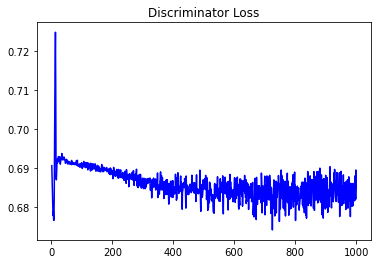

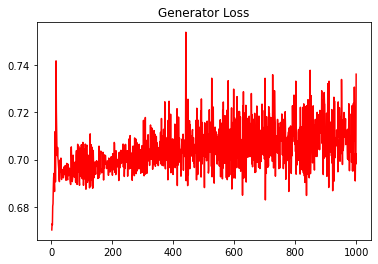

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3806155378911644


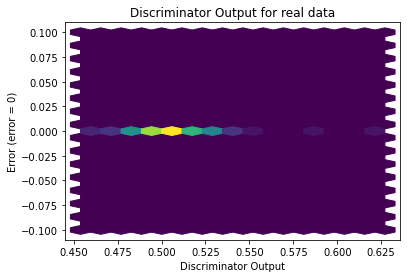

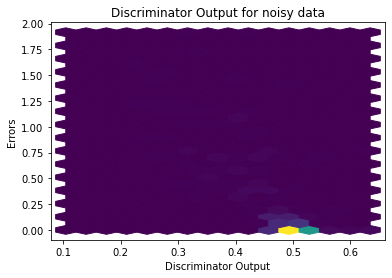

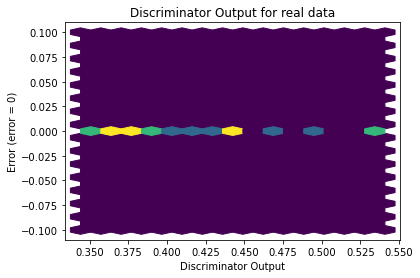

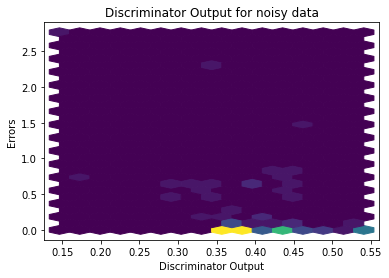

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

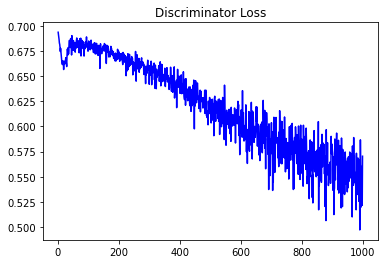

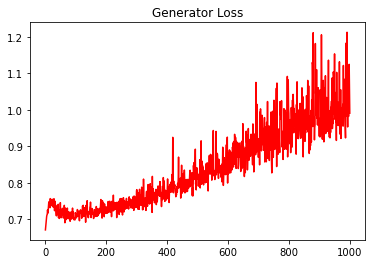

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4731799574717879


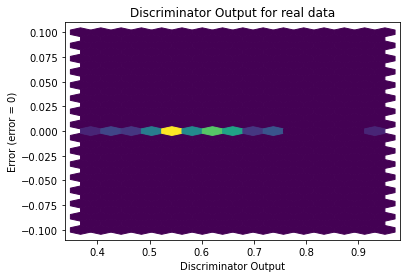

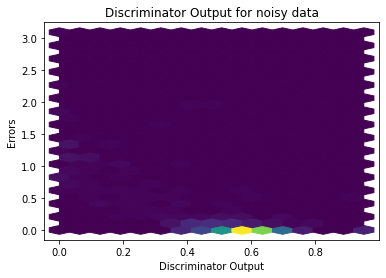

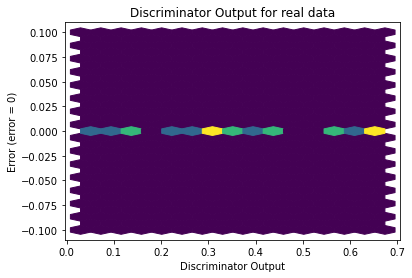

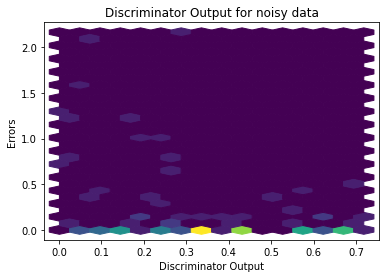

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


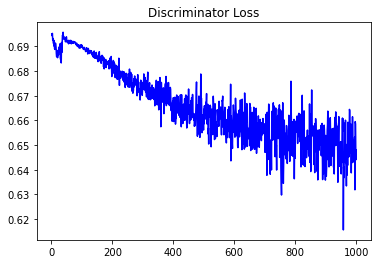

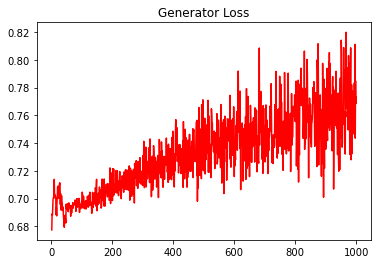

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4486925984635018


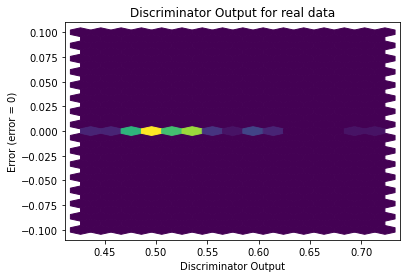

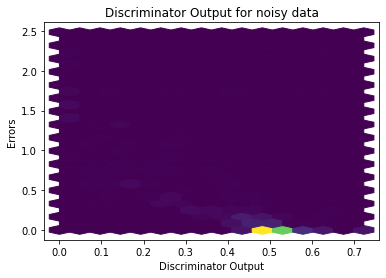

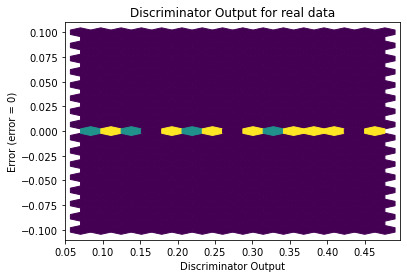

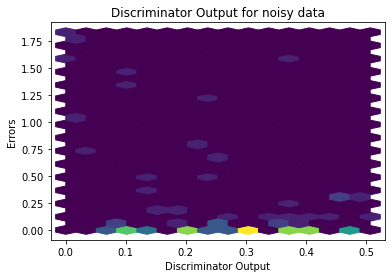

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


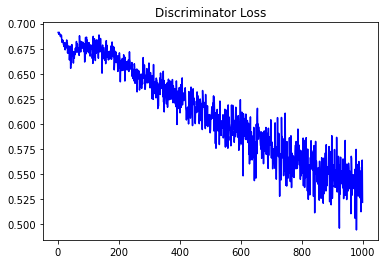

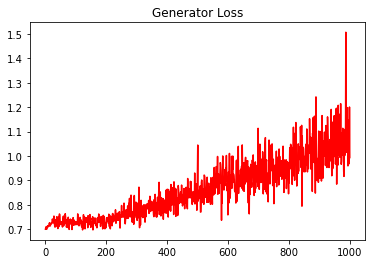

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4940440470231697


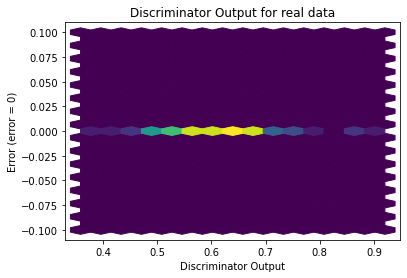

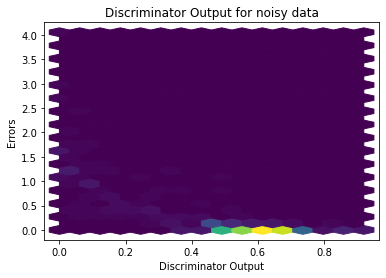

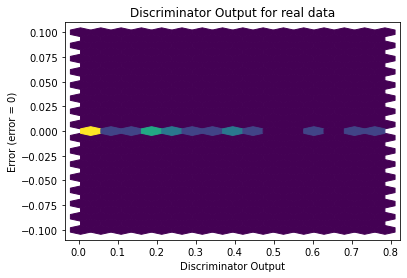

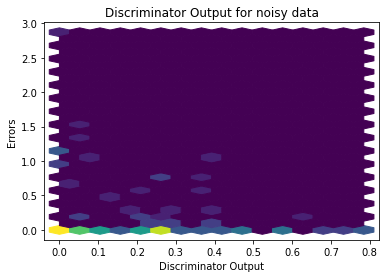

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2490]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6811]], requires_grad=True)
